# EDA Notebook for my data set

### The data set is:
mpg = the full, 'cleaned' data set 


In [1]:
# import all the things
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# add a touch of style to plots
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

In [3]:
# read in all my csv files that I'll be doing EDA on
mpg = pd.read_csv("../datasets/mpg.csv")

In [4]:
# take a peak at the dataframes
display(mpg.head(2))

,year,make,model,vehicle_class,combMPG,cityMPG,hwyMPG,cylinders,displacement,drive,tran_type,fuel_type,co2
0,1985,Alfa Romeo,Spider Veloce 2000,coupe,22.0,19,25,4,2.0,rwd,M,regular,423.190476
1,1985,Ferrari,Testarossa,coupe,11.5,9,14,12,4.9,rwd,M,regular,807.909091


## Preliminary EDA

Simple pandas EDA here.

In [5]:
# Do some very preliminary EDA (which I really did during data munging step)
# Just printing shape, columns, and index
print('Full dataset shape, columns, and index:\nShape:', mpg.shape, 
      '\nColumns:', mpg.columns, 
      '\nIndex:',mpg.index)

Full dataset shape, columns, and index:
Shape: (39825, 13) 
Columns: Index(['year', 'make', 'model', 'vehicle_class', 'combMPG', 'cityMPG',
       'hwyMPG', 'cylinders', 'displacement', 'drive', 'tran_type',
       'fuel_type', 'co2'],
      dtype='object') 
Index: RangeIndex(start=0, stop=39825, step=1)


## .describe() 

A little deeper digging with .describe() to get my first look at some statistics for this dataset

In [6]:
# A bit deeper EDA with .describe() for each data set
print('Display the stats for each dataset')
print('\nFull Dataset')
display(mpg.describe())

Display the stats for each dataset

Full Dataset


,year,combMPG,cityMPG,hwyMPG,cylinders,displacement,co2
count,39825.000000,39825.000000,39825.000000,39825.000000,39825.000000,39825.000000,39825.000000
mean,2001.077338,20.820038,17.675606,23.964470,5.732128,3.307322,472.840847
std,10.995114,4.988879,4.422495,5.712807,1.755840,1.357266,116.874144
min,1984.000000,8.000000,6.000000,9.000000,2.000000,0.900000,185.145833
25%,1991.000000,17.500000,15.000000,20.000000,4.000000,2.200000,386.391304
50%,2002.000000,20.500000,17.000000,24.000000,6.000000,3.000000,459.000000
75%,2011.000000,23.500000,20.000000,27.000000,6.000000,4.300000,535.000000
max,2019.000000,48.500000,44.000000,53.000000,16.000000,8.400000,1269.571429


# Time to dig in and plot some data to get an idea what we're looking at.

As my goal is to examine MPG, my plots will be centered around that data point while striving to root out the underlying reasons behind MPG.

The plot below clearly highlights the major issue in the hybrid/ev combMPG data. 

In [7]:
# group dataframe by year and dump into a holding data frame
# then take the mean of the MPG columns and dump that into another holding data frame
mpg_grouped = mpg.groupby(['year'])
mpg_avg = mpg_grouped['cityMPG', 'hwyMPG','combMPG'].agg([np.mean])

# rename some columns and fix the index of the holding data frame
mpg_avg.columns = ['cityMPG_mean', 'hwyMPG_mean', 'combMPG_mean']
mpg_avg['year'] = mpg_avg.index

mpg_avg.head(10)

,cityMPG_mean,hwyMPG_mean,combMPG_mean,year
year,,,,
1984,17.988787,23.085117,20.536952,1984
1985,17.874044,23.037081,20.455562,1985
1986,17.667494,22.699752,20.183623,1986
1987,17.310345,22.445068,19.877706,1987
1988,17.333628,22.702655,20.018142,1988
1989,17.143972,22.465742,19.804857,1989
1990,17.033395,22.337662,19.685529,1990
1991,16.848940,22.253534,19.551237,1991
1992,16.805531,22.439786,19.622658,1992


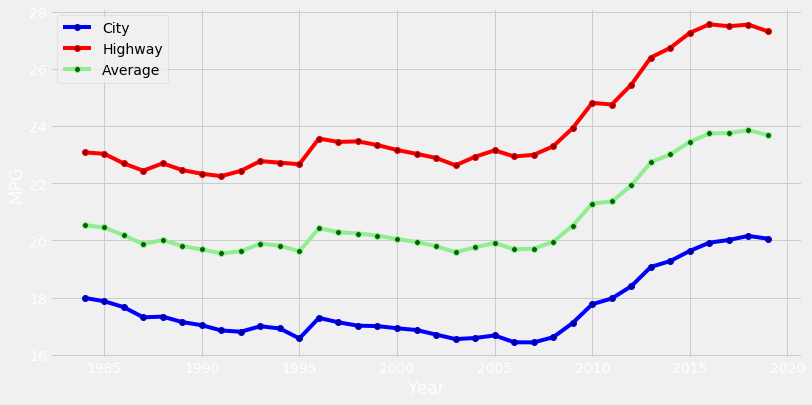

In [19]:
plt.figure(figsize = (12, 6))

# now plot all the MPG columns on one graph for easy comparo
plt.plot('year', 'cityMPG_mean', data = mpg_avg, marker = '.', 
         markerfacecolor = 'darkblue', markersize = 12,color = 'blue', linewidth=4, label = 'City')
plt.plot('year', 'hwyMPG_mean', data = mpg_avg, marker = '.', 
         markerfacecolor = 'darkred', markersize = 12,color = 'red', linewidth=4, label = 'Highway')
plt.plot('year', 'combMPG_mean', data = mpg_avg, marker = '.', 
         markerfacecolor = 'darkgreen', markersize = 12,color = 'lightgreen', linewidth=4, label = 'Average')

# give the plot some labels
# plt.title('MPG Variation over Time', fontsize = 24, fontweight = 'bold', color = 'lightgreen')
plt.xlabel('Year', color = 'white')
plt.ylabel('MPG', color = 'white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors ='white')
plt.legend()

# save the images to files for later use in presentation
plt.savefig('../Presentation/image_files/mpg_time.png', bbox_inches = 'tight')
plt.savefig('../Presentation/image_files/mpg_time_clear.png', transparent = True, bbox_inches = 'tight')

# Some EDA getting down to specifc Makes

Here I want to work on examining just the top 10 makes in this dataset because... well... there are a ton of makes in this data. So, I checked value_counts() for each data frame to determine the top 10 makes in all data sets.

I then threw those top 10s into a list which I used to create a new data frame.

The next step was plotting the data to view trends

In [11]:
print('\nTop ten makes in the mpg data frame:\n', mpg.make.value_counts().head(10))


Top ten makes in the mpg data frame:
 Chevrolet        3926
Ford             3290
Dodge            2578
GMC              2447
Toyota           1947
BMW              1851
Mercedes-Benz    1477
Nissan           1430
Volkswagen       1155
Mitsubishi       1058
Name: make, dtype: int64


In [12]:
# create a data frame based on top 10 makes in the dataset
hold_df = pd.DataFrame(mpg.make.value_counts().head(10)).reset_index()
hold_df.columns = ['a', 'b']

top10_makes = list(hold_df['a'])   # create a list of the top10 makes

# create a new data frame with just the top 10 makes
top10_df = mpg[mpg['make'].isin(top10_makes)]   

# take a peak at the results
display(top10_df.head(2))

,year,make,model,vehicle_class,combMPG,cityMPG,hwyMPG,cylinders,displacement,drive,tran_type,fuel_type,co2
2,1985,Dodge,Charger,subcompact,28.0,23,33,4,2.2,fwd,M,regular,329.148148
3,1985,Dodge,B150/B250 Wagon,van,11.0,10,12,8,5.2,rwd,A,regular,807.909091


# Top 10 Makes vs MPG

A quick and simple bar chat that shows MPG for the top 10 auto makes in the data set

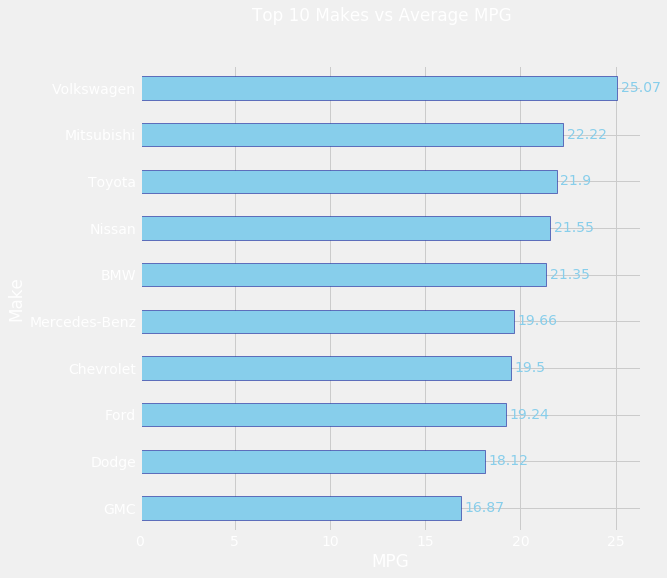

In [17]:
# plot all the things
fig = plt.figure()
ax1 = fig.add_subplot(111)

# a simple horizontal bar chart grouped by make with average of combMPG
top10_df.groupby('make').combMPG.mean().sort_values().plot(kind = 'barh', x = 'make', y = 'combMPG', 
                                                           color = 'skyblue', edgecolor = 'darkblue', ax = ax1)
# add some text
plt.suptitle('Top 10 Makes vs Average MPG', color = 'white')
plt.xlabel('MPG', color = 'white')
plt.ylabel('Make', color = 'white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors ='white')

# add some data labels
for i, v in enumerate(sorted(top10_df.groupby('make').combMPG.mean())):
    plt.text(v+0.2, i, str(round(v, 2)), color='skyblue', va="center")

# output the chart for later use in presentation
plt.savefig('../Presentation/image_files/top10_mpg_clear.png', transparent = True, bbox_inches = 'tight')
plt.savefig('../Presentation/image_files/top10_mpg.png', bbox_inches = 'tight')

plt.show()

# Here ends the EDA notebook. 

## Please continue to the EDA2 notebook ...

### where there will be more EDA before we actually get to making the Machine Learning model ...

#### because we still need to figure out what is up with MPG anyway ...

and because this EDA notebook has gotten...

# HUGE ...

    but before I go - I need to output those top10 data frames I made for use in EDA2

In [35]:
top10_df.to_csv('../datasets/top10_df.csv', index = False)